# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '418' # Laos
# Period
period = '2019' # Annual

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, period + '12', 'HS', 'M')
print(status)
status = tta.data_available(partner, period + '12', 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


# CTH2

In [4]:
cc = 'AG2' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df2 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


In [5]:
df2.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
09,09,"Coffee, tea, mate and spices",0,No Quantity,0.20,0,No Quantity,0.19,0.01,0,NaN,5.000000,0.01,5.000000
12,12,Oil seeds and oleaginous fruits; miscellaneous...,0,No Quantity,0.01,0,No Quantity,0.00,0.01,0,NaN,100.000000,0.01,100.000000
13,13,"Lac; gums, resins and other vegetable saps and...",0,No Quantity,0.10,0,No Quantity,0.12,-0.02,0,NaN,-20.000000,0.02,20.000000
15,15,Animal or vegetable fats and oils and their cl...,0,No Quantity,0.00,0,No Quantity,0.01,-0.01,0,NaN,-inf,0.01,inf
29,29,Organic chemicals,0,No Quantity,0.04,0,No Quantity,0.00,0.04,0,NaN,100.000000,0.04,100.000000
30,30,Pharmaceutical products,0,No Quantity,0.04,0,No Quantity,0.00,0.04,0,NaN,100.000000,0.04,100.000000
33,33,"Essential oils and resinoids; perfumery, cosme...",0,No Quantity,0.00,0,No Quantity,0.00,0.00,0,NaN,NaN,0.00,NaN
39,39,Plastics and articles thereof,0,No Quantity,0.00,0,No Quantity,0.00,0.00,0,NaN,NaN,0.00,NaN
40,40,Rubber and articles thereof,0,No Quantity,0.00,0,No Quantity,0.57,-0.57,0,NaN,-inf,0.57,inf
42,42,Articles of leather; saddlery and harness; tra...,0,No Quantity,0.00,0,No Quantity,0.00,0.00,0,NaN,NaN,0.00,NaN


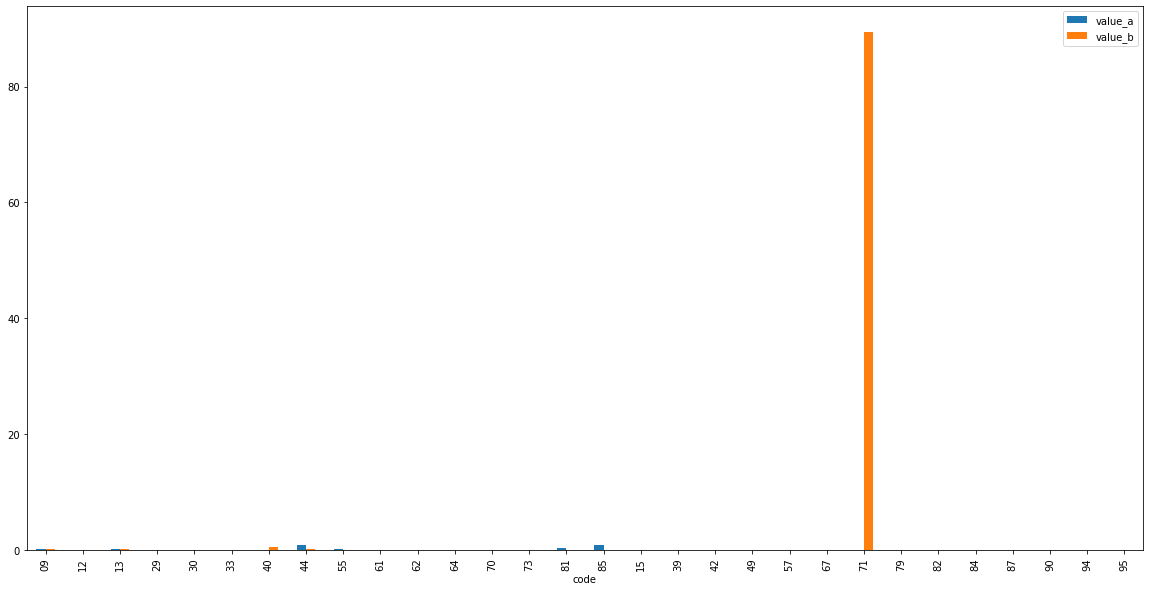

In [6]:
df2.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [7]:
df2.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH4

In [8]:
cc = 'AG4' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df4 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [9]:
df4.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
0901,0901,"Coffee, whether or not roasted or decaffeinate...",155851,Weight in kilograms,0.20,162000,Weight in kilograms,0.19,0.01,-6149,-3.945435e+00,5.000000,0.01,5.000000
1211,1211,Plants and parts of plants (including seeds an...,14000,Weight in kilograms,0.01,0,Weight in kilograms,0.00,0.01,14000,1.000000e+02,100.000000,0.01,100.000000
1301,1301,"Lac; natural gums, resins, gum-resins and oleo...",45000,Weight in kilograms,0.10,92150,Weight in kilograms,0.12,-0.02,-47150,-1.047778e+02,-20.000000,0.02,20.000000
1521,1521,"Vegetable waxes (other than triglycerides), be...",0,Weight in kilograms,0.00,2010,Weight in kilograms,0.01,-0.01,-2010,-inf,-inf,0.01,inf
2917,2917,"Acids; polycarboxylic acids, their anhydrides,...",40000,Weight in kilograms,0.04,0,Weight in kilograms,0.00,0.04,40000,1.000000e+02,100.000000,0.04,100.000000
3002,3002,"Human blood; animal blood for therapeutic, pro...",163,Weight in kilograms,0.04,0,Weight in kilograms,0.00,0.04,163,1.000000e+02,100.000000,0.04,100.000000
3307,3307,"Perfumery, cosmetic or toilet preparations; pr...",1000,Weight in kilograms,0.00,14719,Weight in kilograms,0.00,0.00,-13719,-1.371900e+03,NaN,0.00,NaN
3923,3923,Plastic articles for the conveyance or packing...,0,Weight in kilograms,0.00,765,Weight in kilograms,0.00,0.00,-765,-inf,NaN,0.00,NaN
4001,4001,"Natural rubber, balata, gutta-percha, guayule,...",0,Weight in kilograms,0.00,483840,Weight in kilograms,0.57,-0.57,-483840,-inf,-inf,0.57,inf
4016,4016,Articles of vulcanised rubber other than hard ...,1,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,1,1.000000e+02,NaN,0.00,NaN


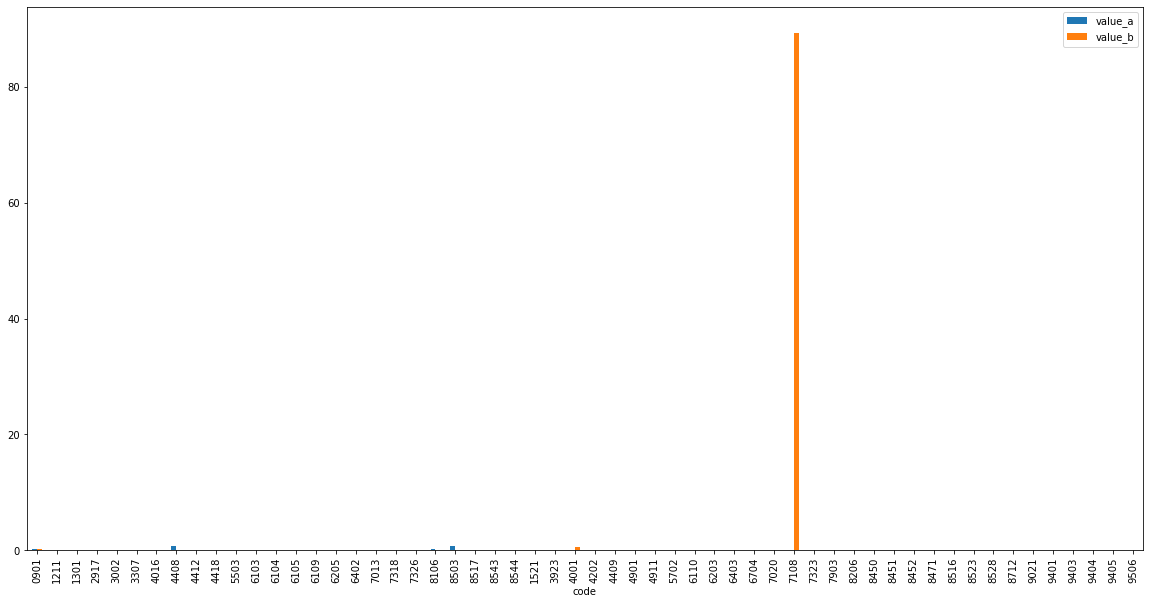

In [10]:
df4.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [11]:
df4.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH6

In [12]:
cc = 'AG6' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df6 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


In [13]:
df6.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
090111,090111,Coffee; not roasted or decaffeinated,155851,Weight in kilograms,0.20,162000,Weight in kilograms,0.19,0.01,-6149,-3.945435e+00,5.000000,0.01,5.000000
121190,121190,Plants and parts (including seeds and fruits) ...,14000,Weight in kilograms,0.01,0,Weight in kilograms,0.00,0.01,14000,1.000000e+02,100.000000,0.01,100.000000
130190,130190,"Natural gums, resins, gum-resins and oleoresin...",45000,Weight in kilograms,0.10,92150,Weight in kilograms,0.12,-0.02,-47150,-1.047778e+02,-20.000000,0.02,20.000000
152190,152190,"Waxes, other than vegetable, n.e.c. in heading...",0,Weight in kilograms,0.00,2010,Weight in kilograms,0.01,-0.01,-2010,-inf,-inf,0.01,inf
291739,291739,Acids; aromatic polycarboxylic acids; n.e.c. i...,40000,Weight in kilograms,0.04,0,Weight in kilograms,0.00,0.04,40000,1.000000e+02,100.000000,0.04,100.000000
300290,300290,"Toxins, cultures of micro-organisms (excluding...",163,Weight in kilograms,0.04,0,Weight in kilograms,0.00,0.04,163,1.000000e+02,100.000000,0.04,100.000000
330741,330741,Perfumes and deodorizers; perfuming or deodori...,1000,Weight in kilograms,0.00,14719,Weight in kilograms,0.00,0.00,-13719,-1.371900e+03,NaN,0.00,NaN
392310,392310,"Plastics; boxes, cases, crates and similar art...",0,Weight in kilograms,0.00,765,Weight in kilograms,0.00,0.00,-765,-inf,NaN,0.00,NaN
400122,400122,Rubber; technically specified natural rubber (...,0,Weight in kilograms,0.00,483840,Weight in kilograms,0.57,-0.57,-483840,-inf,-inf,0.57,inf
401693,401693,"Rubber; vulcanised (other than hard rubber), g...",1,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,1,1.000000e+02,NaN,0.00,NaN


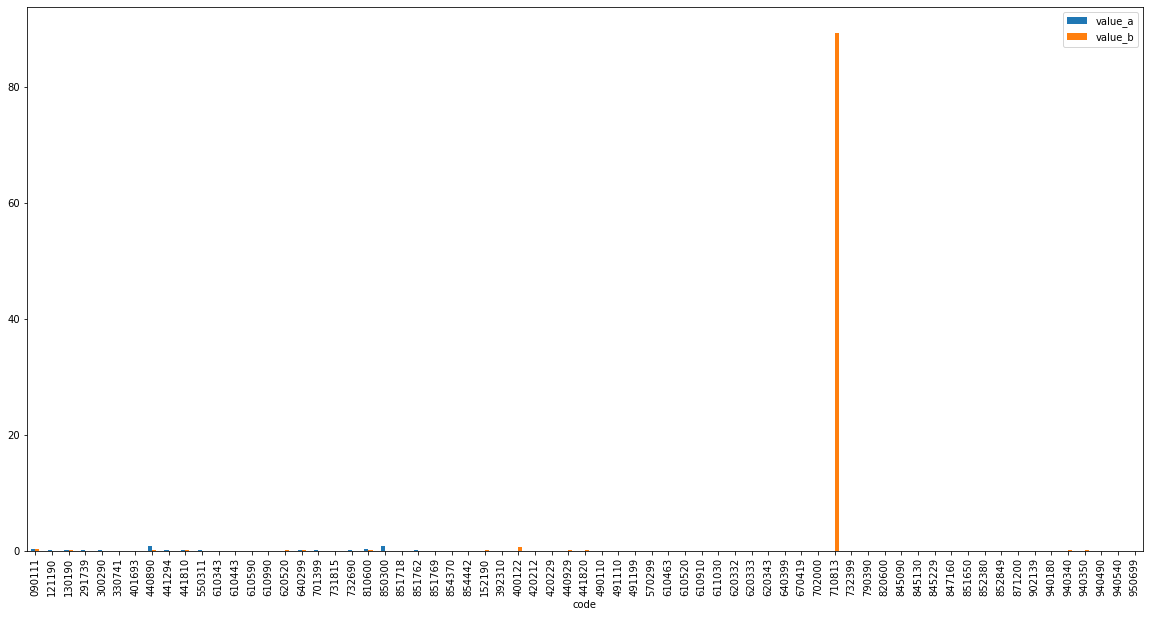

In [15]:
df6.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [16]:
df6.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Aggregation

In [ ]:
df = df6
df['CTH6'] = df['code']
df['CTH4'] = df['code'].str.slice(0,4)
df['CTH2'] = df['code'].str.slice(0,2)
df['QR'] = df['quantity_a'] / df['quantity_b']
df['VR'] = df['value_a'] / df['value_b']
df.groupby(['CTH2']).sum()

# Summary

In [17]:
print("Total import, as per reporter data:", df2['value_a'].sum(), " million USD.")
print("Total export, as per partner data:", df2['value_b'].sum(), " million USD.")

Total import, as per reporter data: 2.5999999999999996  million USD.
Total export, as per partner data: 90.6  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%. You can change the value to better fit the data.

In [33]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter

dfi = df2 # Change to required data_frame
dfi = dfi[(dfi['value_pct_abs'] > percentage_cutoff) & (dfi['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'], ascending=False)

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
71,71,"Natural, cultured pearls; precious, semi-preci...",0,No Quantity,0.0,0,No Quantity,89.35,-89.35,0,NaN,-inf,89.35,inf


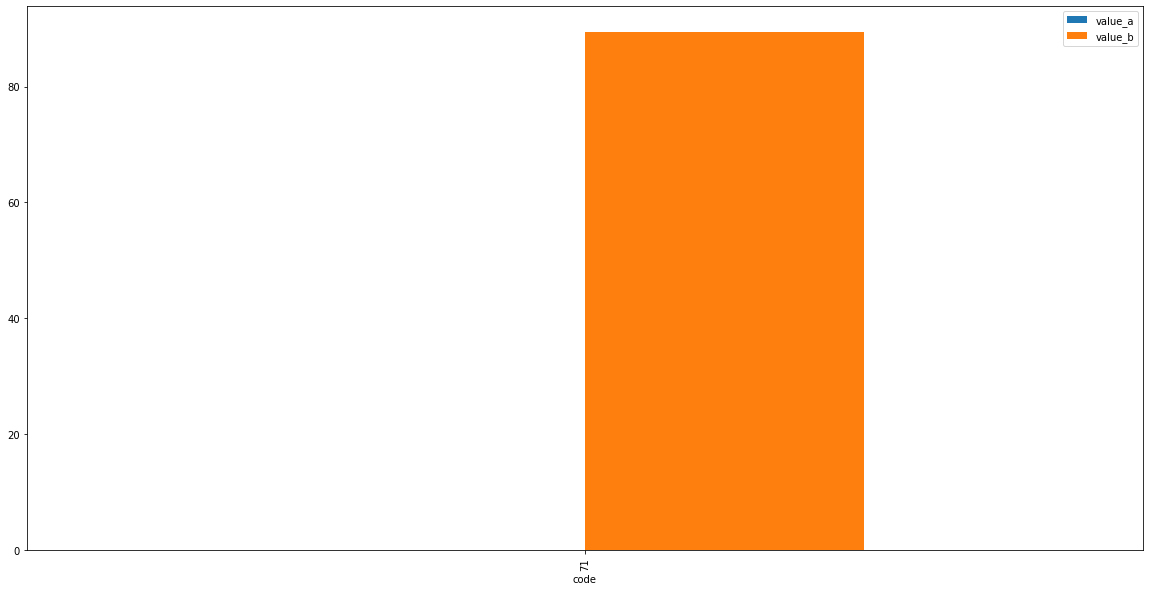

In [34]:
dfi.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()